In [1]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
# Step1.1 補缺值: 數值(中位數)
med = train.median()
train = train.fillna(med)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 千萬不要再重新算一次中位數
test = test.fillna(med)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Step1.2 補缺值: 類別(最常出現)
most = train["Embarked"].value_counts().idxmax()
train["Embarked"] = train["Embarked"].fillna(most)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
test["Embarked"] = test["Embarked"].fillna(most)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Step2. 類別 -> One hot encoding
# 可轉可不轉: 可以承認他有大小關係(Pclass)
#         : 裡面本來就只有兩種值(Sex)
train = pd.get_dummies(train, columns=["Sex", "Embarked"])
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,0,1,0,0


In [9]:
test = pd.get_dummies(test, columns=["Sex", "Embarked"])
test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,0,1,0,0,1
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,NaN,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,NaN,0,1,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,NaN,1,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,NaN,0,1,0,0,1


In [10]:
# 試水溫: 看看一格怎麼做
s = "Braund, Mr. Owen Harris"
s = s.split(",")[-1].split(".")[0]
s.replace(" ", "")

'Mr'

In [11]:
# 看一下多寡
def name_split(s):
    s = s.split(",")[-1].split(".")[0]
    return s.replace(" ", "")   
train["Name"].apply(name_split).value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Col              2
Major            2
Sir              1
Don              1
Lady             1
Ms               1
theCountess      1
Capt             1
Jonkheer         1
Mme              1
Name: Name, dtype: int64

In [12]:
def name(s):
    reserved = ["Mr", "Mrs", "Miss", "Master"]
    s = s.split(",")[-1].split(".")[0]
    s = s.replace(" ", "")   
    if s in reserved:
        return s
    else:
        return "Unknown"
train["Name"] = train["Name"].apply(name)
train = pd.get_dummies(train, columns=["Name"])
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Unknown
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,1,0,0,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1,0,0
5,6,0,3,28.0,0,0,330877,8.4583,NaN,0,1,0,1,0,0,0,1,0,0
6,7,0,1,54.0,0,0,17463,51.8625,E46,0,1,0,0,1,0,0,1,0,0
7,8,0,3,2.0,3,1,349909,21.0750,NaN,0,1,0,0,1,1,0,0,0,0
8,9,1,3,27.0,0,2,347742,11.1333,NaN,1,0,0,0,1,0,0,0,1,0
9,10,1,2,14.0,1,0,237736,30.0708,NaN,1,0,1,0,0,0,0,0,1,0


In [13]:
test["Name"] = test["Name"].apply(name)
test = pd.get_dummies(test, columns=["Name"])
test

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Unknown
0,892,3,34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,0,0,1,0,0
1,893,3,47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,0,0,0,1,0
2,894,2,62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,0,0,1,0,0
3,895,3,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0,1,0,0
4,896,3,22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1,0,0,0,1,0
5,897,3,14.0,0,0,7538,9.2250,NaN,0,1,0,0,1,0,0,1,0,0
6,898,3,30.0,0,0,330972,7.6292,NaN,1,0,0,1,0,0,1,0,0,0
7,899,2,26.0,1,1,248738,29.0000,NaN,0,1,0,0,1,0,0,1,0,0
8,900,3,18.0,0,0,2657,7.2292,NaN,1,0,1,0,0,0,0,0,1,0
9,901,3,21.0,2,0,A/4 48871,24.1500,NaN,0,1,0,0,1,0,0,1,0,0


In [16]:
train = train.drop(["PassengerId", "Ticket", "Cabin", "Name_Unknown"],
                   axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0
5,0,3,28.0,0,0,8.4583,0,1,0,1,0,0,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1,0,0,1,0
7,0,3,2.0,3,1,21.0750,0,1,0,0,1,1,0,0,0
8,1,3,27.0,0,2,11.1333,1,0,0,0,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0,0,0,0,1


In [17]:
pid = test["PassengerId"]
test = test.drop(["PassengerId", "Ticket", "Cabin", "Name_Unknown"],
                   axis=1)
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Master,Name_Miss,Name_Mr,Name_Mrs
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1,0,0,1,0
6,3,30.0,0,0,7.6292,1,0,0,1,0,0,1,0,0
7,2,26.0,1,1,29.0000,0,1,0,0,1,0,0,1,0
8,3,18.0,0,0,7.2292,1,0,1,0,0,0,0,0,1
9,3,21.0,2,0,24.1500,0,1,0,0,1,0,0,1,0


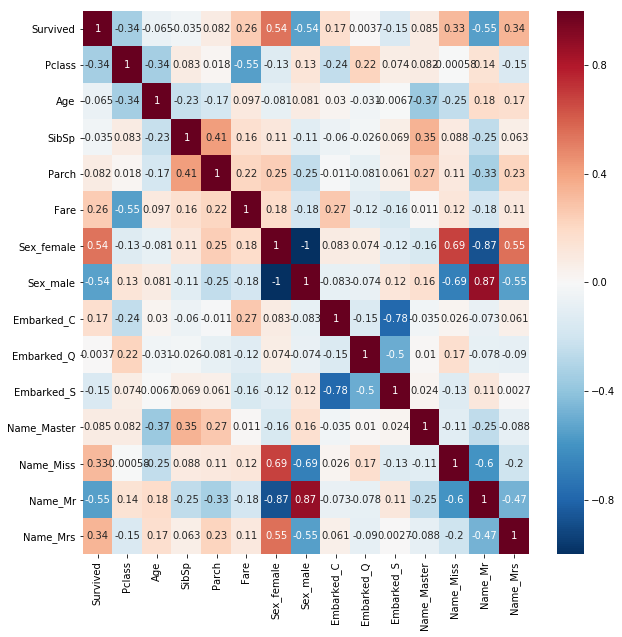

In [23]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, cmap="RdBu_r")